In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")
from tapm import model_HIVandSTI
from tapm import utils

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


In [2]:
args, y0 = utils.read_params(filename="../src/tapm/HIVandSTI/model_HIVandSTI.py")
integrator = model_HIVandSTI.setup_model()

INFO:tapm.HIVandSTI.model_HIVandSTI:Model setup complete and ready for simulation


In [3]:
output = integrator(y0=y0, constant_args=args)

INFO:tapm.HIVandSTI.model_HIVandSTI:Using exponential function to calculate m
INFO:tapm.HIVandSTI.model_HIVandSTI:Parameters: min_exp = 0.0, max_exp = 1.0, tau_exp = 0.2


In [4]:
def n_observed(args, output):
    out = args["lambda_s"]*jnp.sum(jnp.array([output["Is1_STI"], output["Is2_STI"], output["Is3_STI"], output["Is4_STI"]]))+model_HIVandSTI.lambda_a(output,args)*jnp.sum(jnp.array([output["Ia1_STI"], output["Ia2_STI"], output["Ia3_STI"], output["Ia4_STI"]]))
    return out

In [5]:
observed_cases = n_observed(args, output)

In [6]:
def calculate_N_array(y): # number of people per risk group for a given state y (which means at a given time)
    totalNs = []
    for i in range(len(y["S1"])):
        N1 = jnp.sum(jnp.array([y["S1"][i],y["SP1"][i],y["I11"][i],y["IP11"][i],y["I12"][i],y["I13"][i],y["I14"][i],y["A11"][i],y["A12"][i],y["A13"][i],y["A14"][i]]))
        N2 = jnp.sum(jnp.array([y["S2"][i],y["SP2"][i],y["I21"][i],y["IP21"][i],y["I22"][i],y["I23"][i],y["I24"][i],y["A21"][i],y["A22"][i],y["A23"][i],y["A24"][i]]))
        N3 = jnp.sum(jnp.array([y["S3"][i],y["SP3"][i],y["I31"][i],y["IP31"][i],y["I32"][i],y["I33"][i],y["I34"][i],y["A31"][i],y["A32"][i],y["A33"][i],y["A34"][i]]))
        N4 = jnp.sum(jnp.array([y["S4"][i],y["SP4"][i],y["I41"][i],y["IP41"][i],y["I42"][i],y["I43"][i],y["I44"][i],y["A41"][i],y["A42"][i],y["A43"][i],y["A44"][i]]))
        totalNs.append(jnp.sum(jnp.array([N1,N2,N3,N4])))
    return totalNs
#totalNs = calculate_N_array(output)

Key: A11, Last Value: 7.742687054399861e-05
Key: A12, Last Value: 0.001857358064377695
Key: A13, Last Value: 0.00010760884419952393
Key: A14, Last Value: 0.0001336331366031069
Key: A21, Last Value: 0.0008862315061663352
Key: A22, Last Value: 0.021260020992503192
Key: A23, Last Value: 0.0012317649605278526
Key: A24, Last Value: 0.0015296883290437818
Key: A31, Last Value: 0.0036231830018883106
Key: A32, Last Value: 0.08861734912034934
Key: A33, Last Value: 0.005129981496820923
Key: A34, Last Value: 0.006375049829170103
Key: A41, Last Value: 0.00867508343434839
Key: A42, Last Value: 0.21672179720308307
Key: A43, Last Value: 0.012551378806060508
Key: A44, Last Value: 0.015596177850398116
Key: H, Last Value: 0.4434589800443459
Key: I11, Last Value: 1.8134215814228748e-05
Key: I12, Last Value: 0.0004488736973236566
Key: I13, Last Value: 4.8011985256833535e-05
Key: I14, Last Value: 4.165370612886418e-05
Key: I21, Last Value: 0.00020752530193040656
Key: I22, Last Value: 0.005137937980262364
Ke

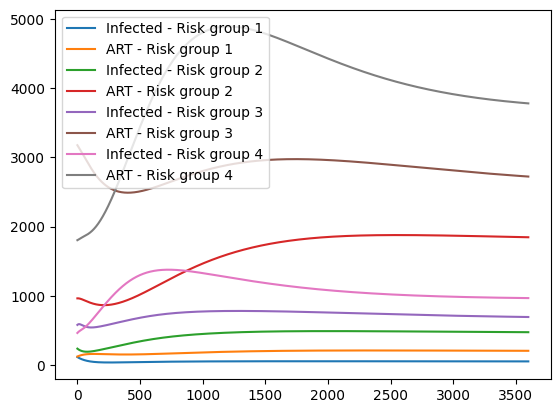

In [7]:

plt.plot(output["I11"]+output["IP11"]+output["I12"]+output["I13"]+output["I14"], label="Infected - Risk group 1")
plt.plot(output["A11"]+output["A12"]+output["A13"]+output["A14"], label="ART - Risk group 1")
plt.plot(output["I21"]+output["IP21"]+output["I22"]+output["I23"]+output["I24"], label="Infected - Risk group 2")
plt.plot(output["A21"]+output["A22"]+output["A23"]+output["A24"], label="ART - Risk group 2")
plt.plot(output["I31"]+output["IP31"]+output["I32"]+output["I33"]+output["I34"], label="Infected - Risk group 3")
plt.plot(output["A31"]+output["A32"]+output["A33"]+output["A34"], label="ART - Risk group 3")
plt.plot(output["I41"]+output["IP41"]+output["I42"]+output["I43"]+output["I44"], label="Infected - Risk group 4")
plt.plot(output["A41"]+output["A42"]+output["A43"]+output["A44"], label="ART - Risk group 4")
plt.legend()
riskgroups = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,1,2,3,4,1,2,3,4,1,2,3,4,1,1,2,2,3,3,4,4,1,2,3,4,1,2,3,4]
N0 = 210000 # initial population size
N01 = 0.451*N0 # initial population size of risk group 1
N02 = 0.353*N0 # initial population size of risk group 2
N03 = 0.125*N0 # initial population size of risk group 3
N04 = 0.071*N0 # initial population size of risk group 4
N0s = [N01,N02,N03,N04]
i = 0
sums = [0,0,0,0]
for key, value in output.items():
    val = value[-1]/N0s[riskgroups[i]-1]
    print(f"Key: {key}, Last Value: {val}")
    sums[riskgroups[i]-1] += val
    i += 1
print(sums)